In [1]:
import pandas as pd
file_path = 'DATA/wines-quality.csv'
df = pd.read_csv(file_path)
print(df.columns)
df.head()

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality', 'color'],
      dtype='object')


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


In [2]:
##vérifier les valeurs manquantes:
print(df.isnull().sum())

fixed_acidity           0
volatile_acidity        0
citric_acid             0
residual_sugar          0
chlorides               0
free_sulfur_dioxide     0
total_sulfur_dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
color                   0
dtype: int64


In [3]:
# Compter les occurrences des différentes valeurs de la colonne "color"
print(df['color'].value_counts())

color
white    4898
red      1599
Name: count, dtype: int64


In [4]:
#### Visualiser les distributions et corrélations
import seaborn as sns
import matplotlib.pyplot as plt

In [5]:
# Encodage One-Hot de la colonne 'color' (on garde 'color_red' par exemple)
df = pd.get_dummies(df, columns=['color'], drop_first=True)
df.tail()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_white
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,True
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,True
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,True
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,True
6496,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6,True


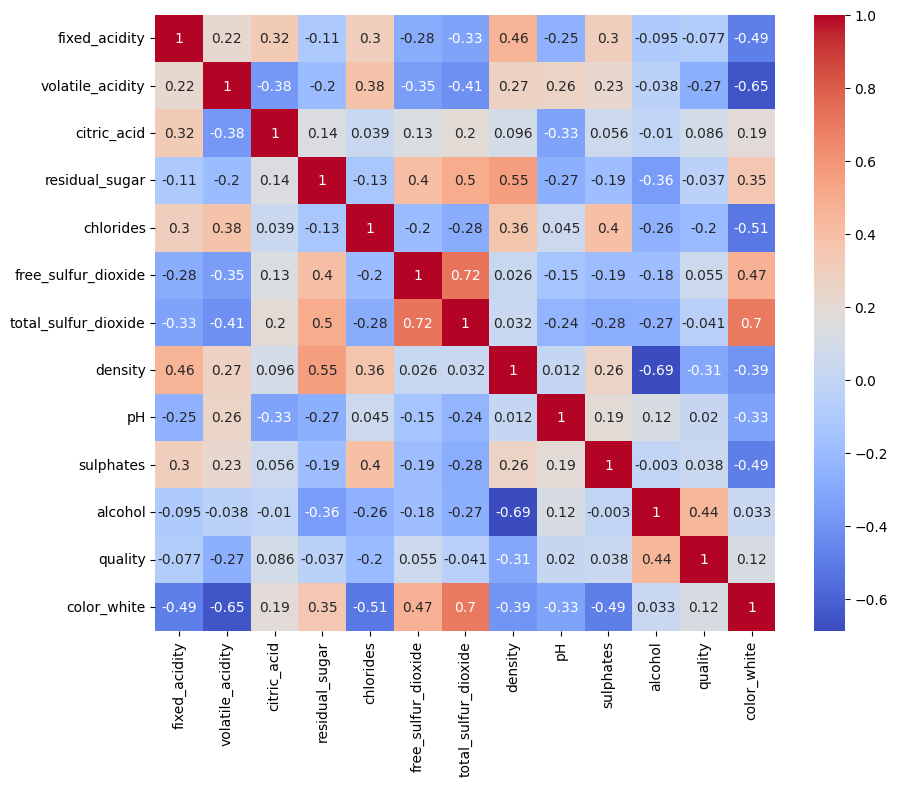

In [6]:
# Visualisation des corrélations entre les variables numériques
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [7]:
# Transformer 'quality' en binaire: si quality >= 6, c'est 1 (bonne qualité), sinon 0 (mauvaise qualité)
df.head()
df['quality_label'] = (df['quality'] >= 6).astype(int)
#df[['quality_label']]
df.head()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality,color_white,quality_label
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,False,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,False,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,False,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,False,0


In [8]:
# Séparer les données entre les variables explicatives et la variable cible
X = df.drop(['quality', 'quality_label'], axis=1) # Variables explicatives (toutes sauf quality et quality_label)
y = df['quality_label'] # Variable cible binaire

In [9]:
from sklearn.model_selection import train_test_split
# Diviser les données (80% pour l'entraînement, 20% pour le test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Entraîner le modèle de régression logistique
from sklearn.linear_model import LogisticRegression

# Créer et entraîner le modèle
model = LogisticRegression(max_iter=5000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=5000)

In [11]:
# Faire des prédictions sur l'ensemble de test
y_pred = model.predict(X_test)

In [12]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Précision du modèle
print("Accuracy:", accuracy_score(y_test, y_pred))

# Matrice de confusion
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Accuracy: 0.7284615384615385
Confusion Matrix:
 [[264 187]
 [166 683]]


In [13]:
# Rapport de classification complet
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.61      0.59      0.60       451
           1       0.79      0.80      0.79       849

    accuracy                           0.73      1300
   macro avg       0.70      0.69      0.70      1300
weighted avg       0.73      0.73      0.73      1300

